In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import re
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

In [2]:
# Function to convert DMS to decimal degrees
def dms_to_decimal(dms):
    deg, minutes, seconds, direction =  re.split('[°\'"]', dms)
    return str((float(deg) + float(minutes)/60 + float(seconds)/(60*60)) * (-1 if direction in [' W', ' S'] else 1))

In [3]:
dms_to_decimal('''21°52'47.362" N''')

'21.87982277777778'

In [4]:
inegi_data = pd.read_csv('Data/conjunto_de_datos_iter_00CSV20.csv', 
                         usecols=['ENTIDAD','NOM_ENT','MUN','NOM_MUN','LOC','NOM_LOC','LONGITUD','LATITUD','POBTOT'])
inegi_data

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,POBTOT
0,0,Total nacional,0,Total nacional,0,Total nacional,NaN,NaN,126014024
1,0,Total nacional,0,Total nacional,9998,Localidades de una vivienda,NaN,NaN,250354
2,0,Total nacional,0,Total nacional,9999,Localidades de dos viviendas,NaN,NaN,147125
3,1,Aguascalientes,0,Total de la entidad Aguascalientes,0,Total de la Entidad,NaN,NaN,1425607
4,1,Aguascalientes,0,Total de la entidad Aguascalientes,9998,Localidades de una vivienda,NaN,NaN,3697
...,...,...,...,...,...,...,...,...,...
195657,32,Zacatecas,58,Santa María de la Paz,37,Mesa Grande,"103°24'52.925"" W","21°33'12.375"" N",165
195658,32,Zacatecas,58,Santa María de la Paz,39,San Isidro,"103°20'14.164"" W","21°29'11.130"" N",1
195659,32,Zacatecas,58,Santa María de la Paz,41,San Miguel Tepetitlán,"103°20'09.356"" W","21°30'15.168"" N",97
195660,32,Zacatecas,58,Santa María de la Paz,42,San Rafael,"103°22'20.134"" W","21°31'39.341"" N",3


In [5]:
inegi_data = inegi_data[(inegi_data['ENTIDAD'] > 0) & (inegi_data['MUN'] > 0) & (inegi_data['LOC'] > 0)].reset_index(drop=True)
inegi_data = inegi_data.dropna()
inegi_data

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,POBTOT
0,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,"102°17'45.768"" W","21°52'47.362"" N",863893
1,1,Aguascalientes,1,Aguascalientes,94,Granja Adelita,"102°22'24.710"" W","21°52'18.749"" N",5
2,1,Aguascalientes,1,Aguascalientes,96,Agua Azul,"102°21'25.639"" W","21°53'01.522"" N",41
3,1,Aguascalientes,1,Aguascalientes,102,Los Arbolitos [Rancho],"102°21'26.261"" W","21°46'48.650"" N",8
4,1,Aguascalientes,1,Aguascalientes,104,Ardillas de Abajo (Las Ardillas),"102°11'30.914"" W","21°56'42.243"" N",1
...,...,...,...,...,...,...,...,...,...
193088,32,Zacatecas,58,Santa María de la Paz,35,Los Trigos (Mesa de los Trigos),"103°14'27.792"" W","21°29'51.355"" N",89
193089,32,Zacatecas,58,Santa María de la Paz,37,Mesa Grande,"103°24'52.925"" W","21°33'12.375"" N",165
193090,32,Zacatecas,58,Santa María de la Paz,39,San Isidro,"103°20'14.164"" W","21°29'11.130"" N",1
193091,32,Zacatecas,58,Santa María de la Paz,41,San Miguel Tepetitlán,"103°20'09.356"" W","21°30'15.168"" N",97


In [6]:
inegi_data['LONGITUD'] = inegi_data['LONGITUD'].apply(dms_to_decimal).astype(np.float64).round(1)
inegi_data['LATITUD'] = inegi_data['LATITUD'].apply(dms_to_decimal).astype(np.float64).round(1)

In [7]:
inegi_data['LOC_ID'] = (inegi_data['ENTIDAD'].astype(str)) + (inegi_data['MUN'].astype(str)) + (inegi_data['LOC'].astype(str))
inegi_data['MUN_ID'] = (inegi_data['ENTIDAD'].astype(str)) + (inegi_data['MUN'].astype(str))
inegi_data['ENTIDAD_ID'] = (inegi_data['ENTIDAD'].astype(str))
inegi_data['LAT_LONG'] = '[' + inegi_data['LATITUD'].astype(str) + ', ' + inegi_data['LONGITUD'].astype(str) + ']'
inegi_data['COUNT'] = 1
inegi_data

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,POBTOT,LOC_ID,MUN_ID,ENTIDAD_ID,LAT_LONG,COUNT
0,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,-102.3,21.9,863893,111,11,1,"[21.9, -102.3]",1
1,1,Aguascalientes,1,Aguascalientes,94,Granja Adelita,-102.4,21.9,5,1194,11,1,"[21.9, -102.4]",1
2,1,Aguascalientes,1,Aguascalientes,96,Agua Azul,-102.4,21.9,41,1196,11,1,"[21.9, -102.4]",1
3,1,Aguascalientes,1,Aguascalientes,102,Los Arbolitos [Rancho],-102.4,21.8,8,11102,11,1,"[21.8, -102.4]",1
4,1,Aguascalientes,1,Aguascalientes,104,Ardillas de Abajo (Las Ardillas),-102.2,21.9,1,11104,11,1,"[21.9, -102.2]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193088,32,Zacatecas,58,Santa María de la Paz,35,Los Trigos (Mesa de los Trigos),-103.2,21.5,89,325835,3258,32,"[21.5, -103.2]",1
193089,32,Zacatecas,58,Santa María de la Paz,37,Mesa Grande,-103.4,21.6,165,325837,3258,32,"[21.6, -103.4]",1
193090,32,Zacatecas,58,Santa María de la Paz,39,San Isidro,-103.3,21.5,1,325839,3258,32,"[21.5, -103.3]",1
193091,32,Zacatecas,58,Santa María de la Paz,41,San Miguel Tepetitlán,-103.3,21.5,97,325841,3258,32,"[21.5, -103.3]",1


In [8]:
inegi_data_grouped = inegi_data.groupby(['ENTIDAD_ID','LONGITUD','LATITUD']).agg({'POBTOT': 'sum'}).reset_index()
inegi_data_grouped

,ENTIDAD_ID,LONGITUD,LATITUD,POBTOT
0,1,-102.8,21.8,9498
1,1,-102.8,21.9,729
2,1,-102.7,21.7,15
3,1,-102.7,21.8,23732
4,1,-102.7,21.9,20038
...,...,...,...,...
15098,9,-99.1,19.4,2683885
15099,9,-99.1,19.5,1173351
15100,9,-99.0,19.2,153809
15101,9,-99.0,19.3,342957


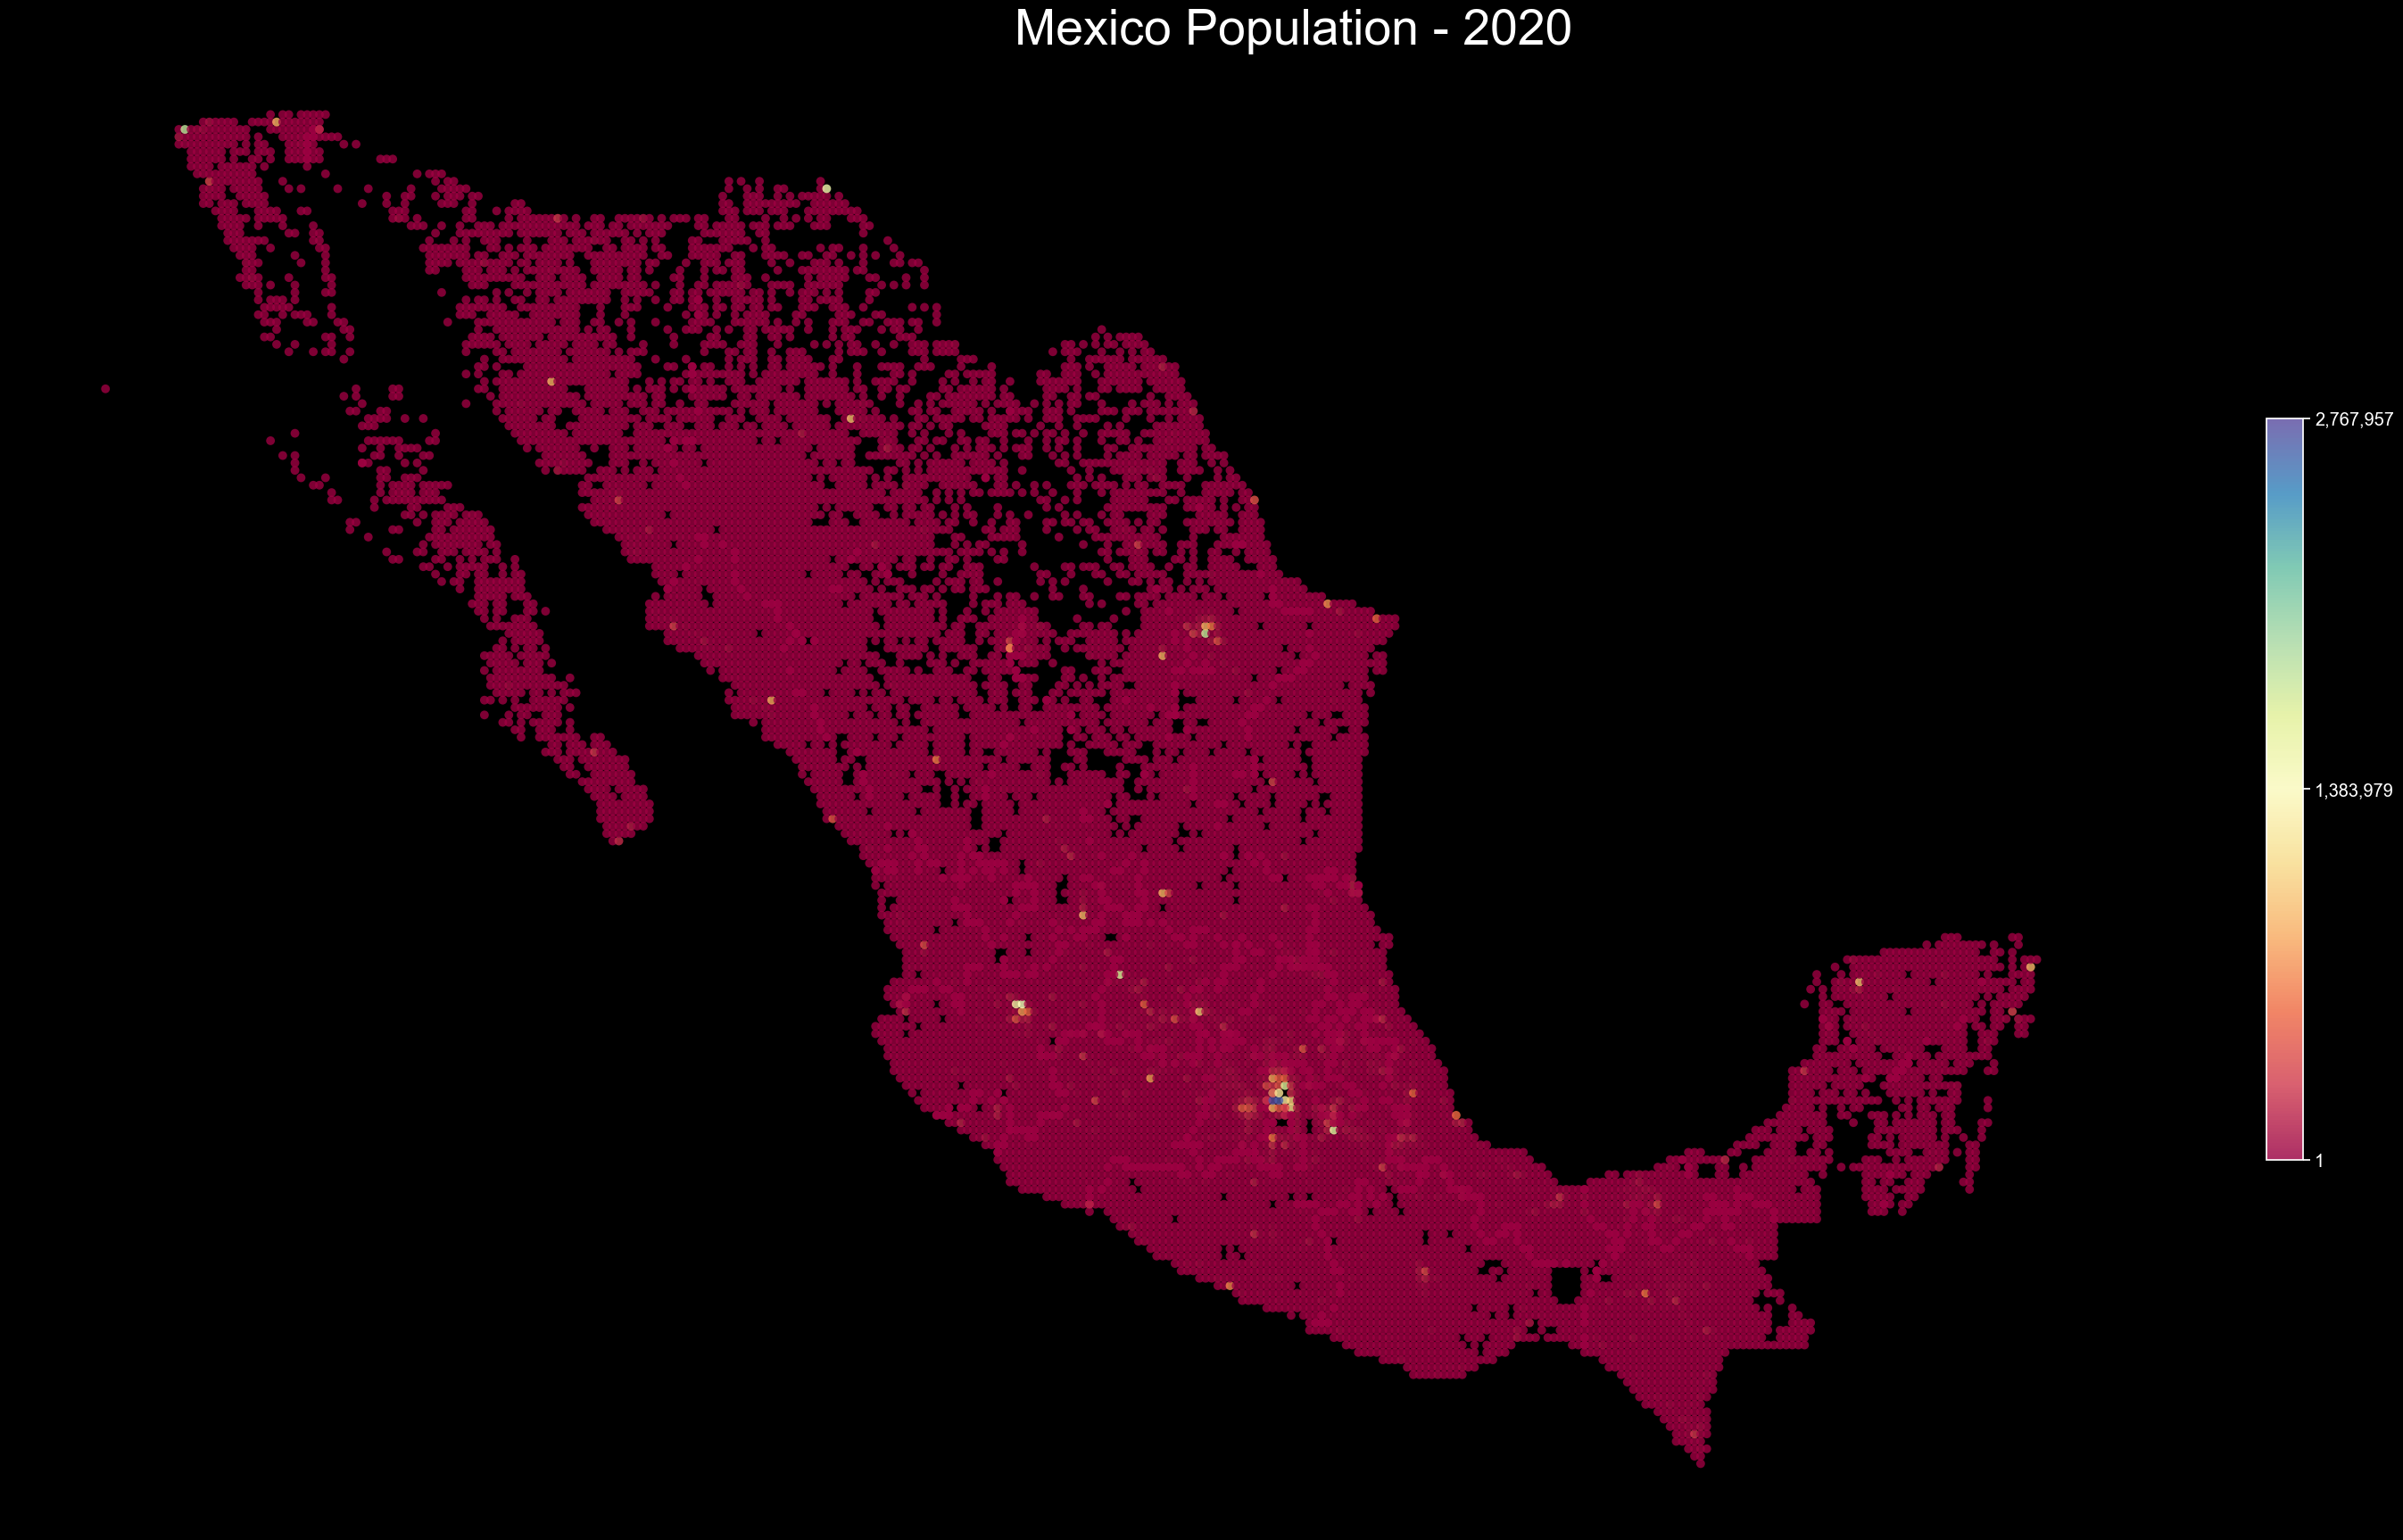

In [16]:
sns.set_theme(font='sans-serif', font_scale=1, color_codes=True)

# Your existing code
fig = plt.figure(figsize=(38.40, 21.60))
plt.axis('off')

rect = fig.patch
rect.set_facecolor('black')

# Create a colormap based on the 'rocket_r' palette
cmap = sns.color_palette("Spectral", as_cmap=True)

# Create a heatmap-like scatter plot using plt.scatter
scatter = plt.scatter(data=inegi_data_grouped,
                      x='LONGITUD', y='LATITUD', c='POBTOT',
                      cmap=cmap, edgecolor='none', s=50, alpha=0.80,
                      norm=plt.Normalize(vmin=inegi_data_grouped['POBTOT'].min(), vmax=inegi_data_grouped['POBTOT'].max())
                     )

# Assuming you have a colorbar
colorbar = plt.colorbar(scatter, orientation='vertical', shrink=0.5)

# Set the ticks
ticks = [inegi_data_grouped['POBTOT'].min(),
         (inegi_data_grouped['POBTOT'].min() + inegi_data_grouped['POBTOT'].max()) / 2,
         inegi_data_grouped['POBTOT'].max()]

colorbar.set_ticks(ticks)

# Set the tick colors to white
colorbar.ax.tick_params(axis='y', colors='white', labelsize='large')

# Optionally set tick labels with commas for thousands
colorbar.ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

fig.suptitle('Mexico Population - 2020', fontsize=40, y=0.9, color='white')

# Show the plot
plt.show()

fig.savefig(f'INEGI_2020.png', bbox_inches='tight')